## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importación de datos



In [2]:

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#0. Exploracion de datos

In [3]:
tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


## df tienen mismas columnas

In [4]:
names = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
all_data = {name:df for name,df in zip(names,[tienda1, tienda2, tienda3, tienda4])}

In [5]:
def is_same_columns(list_df):
    """
    Check if all DataFrames in a list have identical columns and dtypes.
    """
    if not list_df:
        return True  # Empty list — no conflict

    # Reference from first DataFrame
    ref = list_df[0]
    ref_cols = list(ref.columns)
    ref_dtypes = ref.dtypes.to_dict()

    for i, df in enumerate(list_df[1:], start=2):
        if not df.columns.equals(ref.columns):
            print(f"❌ Columns differ in DataFrame {i}")
            return False
        if not df.dtypes.equals(ref.dtypes):
            print(f"❌ Dtypes differ in DataFrame {i}")
            return False

    return True

is_same_columns(list(all_data.values()))

True

## Ajuste formato tiempo

In [6]:
def adjust_date_format(df, column_name='Fecha de Compra'):
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce', dayfirst=True)

#all_data = [tienda1, tienda2, tienda3, tienda4]
for df in all_data.values():
  adjust_date_format(df)


## df tiene mismas Categoría del Producto

In [7]:
categorias = set(tienda1['Categoría del Producto'].unique())
print(categorias)

for name, df in  all_data.items():
  print(name,set(df['Categoría del Producto'].unique()) == categorias)

#categorias = set(tienda1['Categoría del Producto'].unique())

{'Juguetes', 'Electrodomésticos', 'Instrumentos musicales', 'Electrónicos', 'Artículos para el hogar', 'Libros', 'Muebles', 'Deportes y diversión'}
tienda1 True
tienda2 True
tienda3 True
tienda4 True


## revision global

In [8]:
#se puede revisar tienda por tienda
df = all_data['tienda4']

global_info ={}
for col in df.columns:
  if df[col].dtype == 'object':
    global_info[col] = df[col].unique()

for k,v in global_info.items():
  print(k,v)
  print()



Producto ['Lavavajillas' 'Cama box' 'Balón de baloncesto' 'Modelado predictivo'
 'Auriculares' 'Refrigerador' 'Guitarra eléctrica'
 'Auriculares con micrófono' 'Iphone 15' 'Mesa de noche' 'Muñeca bebé'
 'Dashboards con Power BI' 'Silla de oficina' 'Kit de bancas' 'Impresora'
 'Set de vasos' 'Mesa de comedor' 'Carrito de control remoto'
 'Cuerda para saltar' 'Estufa' 'Cama king' 'Balón de voleibol'
 'Secadora de ropa' 'Dinosaurio Rex' 'TV LED UHD 4K' 'Vaso térmico'
 'Smart TV' 'Mesa de centro' 'Tablet ABXY' 'Olla de presión' 'Batería'
 'Pandereta' 'Iniciando en programación' 'Juego de mesa' 'Celular ABXY'
 'Cubertería' 'Armario' 'Bloques de construcción' 'Bicicleta'
 'Asistente virtual' 'Set de ollas' 'Guitarra acústica'
 'Ajedrez de madera' 'Microondas' 'Smartwatch' 'Mochila'
 'Lavadora de ropa' 'Ciencia de datos con Python' 'Cubo mágico 8x8'
 'Sillón' 'Sofá reclinable']

Categoría del Producto ['Electrodomésticos' 'Muebles' 'Deportes y diversión' 'Libros'
 'Electrónicos' 'Instrumentos

## Productos por categoria

In [9]:
df = all_data['tienda2']
productos_por_categoria = {}
total_products = 0
for cat in df['Categoría del Producto'].unique():
  productos_por_categoria[cat] = df[df['Categoría del Producto']==cat]['Producto'].unique()
  cnt = len(productos_por_categoria[cat])
  total_products += cnt
  print(cat,productos_por_categoria[cat],cnt)
  print()
print(f"Hay {total_products } productos en Total ")

Muebles ['Silla de oficina' 'Cama king' 'Sillón' 'Armario' 'Mesa de centro'
 'Mesa de comedor' 'Kit de bancas' 'Cama box' 'Sofá reclinable'
 'Mesa de noche'] 10

Instrumentos musicales ['Pandereta' 'Guitarra acústica' 'Guitarra eléctrica' 'Batería'] 4

Deportes y diversión ['Mochila' 'Bicicleta' 'Cuerda para saltar' 'Vaso térmico'
 'Balón de baloncesto' 'Balón de voleibol'] 6

Electrónicos ['Tablet ABXY' 'TV LED UHD 4K' 'Auriculares con micrófono' 'Smart TV'
 'Celular ABXY' 'Asistente virtual' 'Auriculares' 'Smartwatch' 'Impresora'
 'Iphone 15'] 10

Artículos para el hogar ['Olla de presión' 'Set de vasos' 'Cubertería' 'Set de ollas'] 4

Juguetes ['Cubo mágico 8x8' 'Juego de mesa' 'Ajedrez de madera' 'Muñeca bebé'
 'Bloques de construcción' 'Dinosaurio Rex' 'Carrito de control remoto'] 7

Electrodomésticos ['Secadora de ropa' 'Lavavajillas' 'Estufa' 'Refrigerador'
 'Lavadora de ropa' 'Microondas'] 6

Libros ['Modelado predictivo' 'Dashboards con Power BI'
 'Ciencia de datos con Python'

In [10]:

def summarize_dataframes(dataframes, names=None,print_rev = False):
    """
    Print a concise summary for each DataFrame:
    - Shape (rows, columns)
    - Columns with missing values and their counts
    - Descriptive statistics (rounded to 2 decimals)
    """
    if names is None:
        names = [f"DataFrame {i+1}" for i in range(len(dataframes))]

    ans = {}
    for name, df in zip(names, dataframes):
        print(f"\n📊 Summary for {name}")
        print("=" * (12 + len(name)))

        # Shape
        print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

        # Missing values
        na_counts = df.isna().sum()
        na_counts = na_counts[na_counts > 0]
        if not na_counts.empty:
            print("\nMissing values:")
            print(na_counts.sort_values(ascending=False))
        else:
            print("\nNo missing values ✅")

        # Descriptive statistics
        if print_rev:
          print("\nDescriptive statistics:")
          #print(df.describe(include='all').round(2))
          print(df.describe().round(2))
        print("-" * 60)

        ans[name] = df.describe().round(2)

    return ans
analisis = summarize_dataframes(list(all_data.values()), list(all_data.keys()),False)



📊 Summary for tienda1
Shape: 2359 rows × 12 columns

No missing values ✅
------------------------------------------------------------

📊 Summary for tienda2
Shape: 2359 rows × 12 columns

No missing values ✅
------------------------------------------------------------

📊 Summary for tienda3
Shape: 2359 rows × 12 columns

No missing values ✅
------------------------------------------------------------

📊 Summary for tienda4
Shape: 2358 rows × 12 columns

No missing values ✅
------------------------------------------------------------


In [11]:
analisis['tienda3']

,Precio,Costo de envío,Fecha de Compra,Calificación,Cantidad de cuotas,lat,lon
count,2359.00,2359.00,2359,2359.00,2359.00,2359.00,2359.00
mean,465459.77,24805.68,2021-08-22 16:01:25.459940608,4.05,2.97,5.44,-74.73
min,7600.00,0.00,2020-01-01 00:00:00,1.00,1.00,-4.22,-77.28
25%,57400.00,3100.00,2020-10-27 12:00:00,4.00,1.00,4.61,-75.56
50%,226300.00,11900.00,2021-09-06 00:00:00,5.00,2.00,4.61,-74.20
75%,666050.00,34950.00,2022-06-15 12:00:00,5.00,4.00,6.25,-74.08
max,2968200.00,158400.00,2023-03-31 00:00:00,5.00,24.00,11.54,-67.92
std,580643.39,30945.89,NaN,1.39,2.81,2.41,1.22


In [12]:
#just to check if there is a min less than cero
for name, df_analisis in analisis.items():
  print(name, df_analisis.loc['min','Precio'],df_analisis.loc['min','Costo de envío'])
  print()


tienda1 7600.0 0.0

tienda2 7600.0 0.0

tienda3 7600.0 0.0

tienda4 7600.0 0.0



## Revision de Outliers

In [13]:
import numpy as np

def review_outliers_iqr(df,colums_review = ['Precio','Costo de envío'],columns_filter=['Categoría del Producto','Producto'], threshold=1.5):
  """
  Detect potential outliers in numeric colums_review using the IQR method.
  but using columns filter to group

  note:It doesn’t necessarily mean that the distribution is perfectly clean —
  only that the IQR rule (with your chosen threshold) doesn’t flag any outliers.
  """
  ans = {}

  for col in colums_review:
    df_reveiw = df.groupby(columns_filter)[col].describe()
    df_reveiw.columns = [''.join(col).strip() for col in df_reveiw.columns.values] # Aplanar las columnas multiindex creadas en groupby
    df_reveiw = df_reveiw.reset_index()


    df_reveiw['lower_bound'] = df_reveiw['25%'] - (df_reveiw['75%']-df_reveiw['25%'])*threshold
    df_reveiw['upper_bound'] = df_reveiw['75%'] + (df_reveiw['75%']-df_reveiw['25%'])*threshold
    df_reveiw['outliers'] = ~((df_reveiw['upper_bound'] > df_reveiw['max']) | (df_reveiw['min'] > df_reveiw['lower_bound']))

    ans[col] = any(df_reveiw['outliers'])

  for col,outlier in ans.items():
      print(f"the column {col} {'possibly have' if outlier else 'doesn’t flag any'} outliers")

  return ans

df = all_data['tienda2']
review_outliers_iqr(df,colums_review = ['Precio','Costo de envío'],columns_filter=['Categoría del Producto','Producto'], threshold=1.5)



the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers


{'Precio': False, 'Costo de envío': True}

In [14]:

for name, df in all_data.items():
  print(name)
  review_outliers_iqr(df)


tienda1
the column Precio doesn’t flag any outliers
the column Costo de envío doesn’t flag any outliers
tienda2
the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers
tienda3
the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers
tienda4
the column Precio doesn’t flag any outliers
the column Costo de envío possibly have outliers


In [15]:
def review_outliers_2(df,column,columns_filter,threshold=1.5):
    """
    Detects outliers in `column` grouped by `columns_filter`
    using the IQR method.
    Returns a DataFrame containing only outlier rows.
    """

    # Describe stats per group
    df_review = df.groupby(columns_filter)[column].describe().reset_index()

    # Compute IQR and bounds
    iqr = df_review['75%'] - df_review['25%']
    df_review['lower_bound'] = df_review['25%'] - iqr * threshold
    df_review['upper_bound'] = df_review['75%'] + iqr * threshold

    # Merge back to original dataframe
    df_merged = df.merge(df_review[columns_filter + ['lower_bound', 'upper_bound']], on=columns_filter, how='left')

    # Filter rows that are outside bounds (outliers)
    df_outliers = df_merged[
        (df_merged[column] < df_merged['lower_bound']) |
        (df_merged[column] > df_merged['upper_bound'])
    ].copy()

    return df_outliers

#play with threshold=3
df = all_data['tienda4']

df_review = review_outliers_2(df, column = 'Costo de envío',columns_filter=['Categoría del Producto','Producto'], threshold=3)

df_review[['Categoría del Producto','Producto', 'Lugar de Compra','Precio', 'Costo de envío','upper_bound']].sort_values(by='Categoría del Producto')



,Categoría del Producto,Producto,Lugar de Compra,Precio,Costo de envío,upper_bound
103,Artículos para el hogar,Set de vasos,Bogotá,39800.0,8900.0,6025.0
1146,Artículos para el hogar,Set de vasos,Cali,27400.0,7300.0,6025.0
1031,Artículos para el hogar,Set de vasos,Cali,33100.0,8600.0,6025.0
657,Artículos para el hogar,Set de vasos,Leticia,39500.0,8900.0,6025.0
310,Artículos para el hogar,Set de vasos,Bogotá,27700.0,10200.0,6025.0
372,Artículos para el hogar,Set de vasos,Barranquilla,43500.0,8400.0,6025.0
2189,Deportes y diversión,Cuerda para saltar,Medellín,18400.0,6600.0,6000.0
117,Deportes y diversión,Cuerda para saltar,Bogotá,18000.0,7800.0,6000.0
540,Deportes y diversión,Cuerda para saltar,Soacha,18300.0,7000.0,6000.0
769,Instrumentos musicales,Pandereta,Bogotá,91200.0,11700.0,11600.0


En revision los datos parecen estar limpios y son consistentes, incluso los que se podrian considerar outliers no parecen alejarse mucho de los valores maximos por lo que se podrian asumir que los valores son utiles.

In [16]:
#unificando en un solo dataframe
for name, df in all_data.items():
  df.insert(0, "Tienda",name)

df_all = pd.concat(all_data.values())
print(df_all.shape)
df_all.sample(5)

(9435, 13)


,Tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2180,tienda1,Asistente virtual,Electrónicos,137400.0,7700.0,2021-12-08,Ángel Rodriguez,Medellín,5,Tarjeta de crédito,8,6.25184,-75.56359
1819,tienda1,Batería,Instrumentos musicales,1002300.0,51600.0,2022-07-17,Maria Alfonso,Pereira,5,Tarjeta de crédito,4,4.81333,-75.69611
1228,tienda2,Auriculares,Electrónicos,96600.0,3300.0,2022-08-22,Blanca Ramirez,Cúcuta,2,Tarjeta de crédito,3,7.89391,-72.50782
80,tienda3,Dashboards con Power BI,Libros,44200.0,0.0,2021-07-20,Ángel Rodriguez,Bogotá,5,Tarjeta de crédito,5,4.60971,-74.08175
2047,tienda1,Mesa de noche,Muebles,265000.0,12300.0,2021-04-05,Beatriz Morales,Medellín,4,Cupón,1,6.25184,-75.56359


#1. Análisis de facturación



## Análisis general

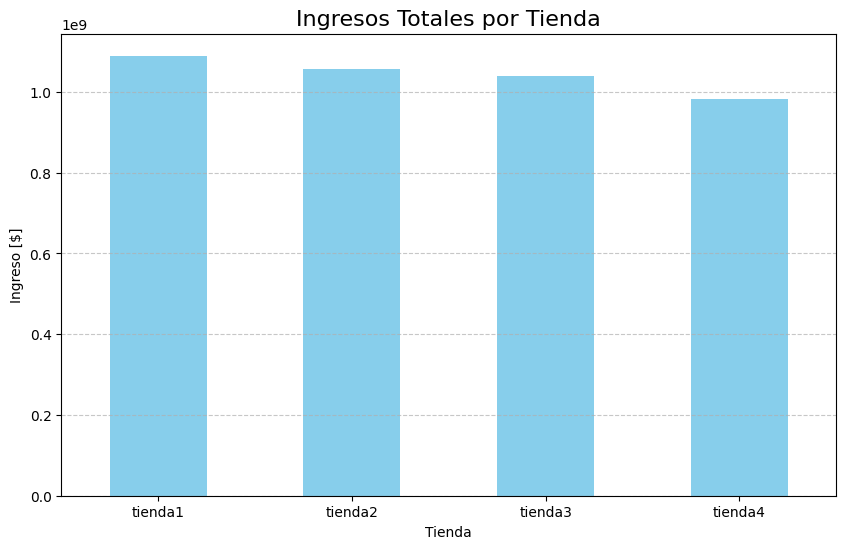

In [17]:
df_all["Ingreso Total"] = df_all["Precio"] - df_all["Costo de envío"]
df_ingreso_tienda = df_all.groupby("Tienda")["Ingreso Total"].sum().sort_values(ascending=False)

df_ingreso_tienda.plot(kind="bar", figsize=(10, 6),color='skyblue')
plt.ylabel('Ingreso [$]', fontsize=10)
plt.title("Ingresos Totales por Tienda", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)
plt.show()

## Análisis en el tiempo

In [20]:
def ingresos_por_tienda_y_tiempo(df_all,periodo="M"):
  """
    Devuelve df con ingresos por tienda por el periodo.

    Parámetros
    ----------
    df_all :
      df con informacion de todas las tiendas, debe por lo menos tener las columnas:
      'Tienda', 'Fecha de Compra', 'Precio', 'Costo de envío' y/o 'Ingreso Total'
    periodo:
      D calendar day frequency
      W weekly frequency
      M monthly frequency
      Q quarterly frequency
      Y yearly frequency
  """
  if periodo not in ['D', 'W', 'M', 'Q', 'Y']:
    raise ValueError(
        f"El parámetro 'periodo' debe ser uno de: D, W, M, Q, Y. Valor recibido: {periodo}"
    )

  if any(col not in df_all.columns for col in ['Tienda', 'Fecha de Compra', 'Precio', 'Costo de envío']):
    raise ValueError("Las columnas necesarias para el calculo no estan presentes")

  if 'Ingreso Total' not in df_all.columns:
    df_all["Ingreso Total"] = df_all["Precio"] - df_all["Costo de envío"]

  df = df_all[["Tienda","Fecha de Compra","Ingreso Total"]].copy()

  df["Periodo"] = df["Fecha de Compra"].dt.to_period(periodo)

  df_ingresos = df.groupby(["Tienda","Periodo"])["Ingreso Total"].sum().reset_index().sort_values(["Tienda", "Periodo"])

  return df_ingresos

df_ingresos_periodo = ingresos_por_tienda_y_tiempo(df_all,periodo="Q")


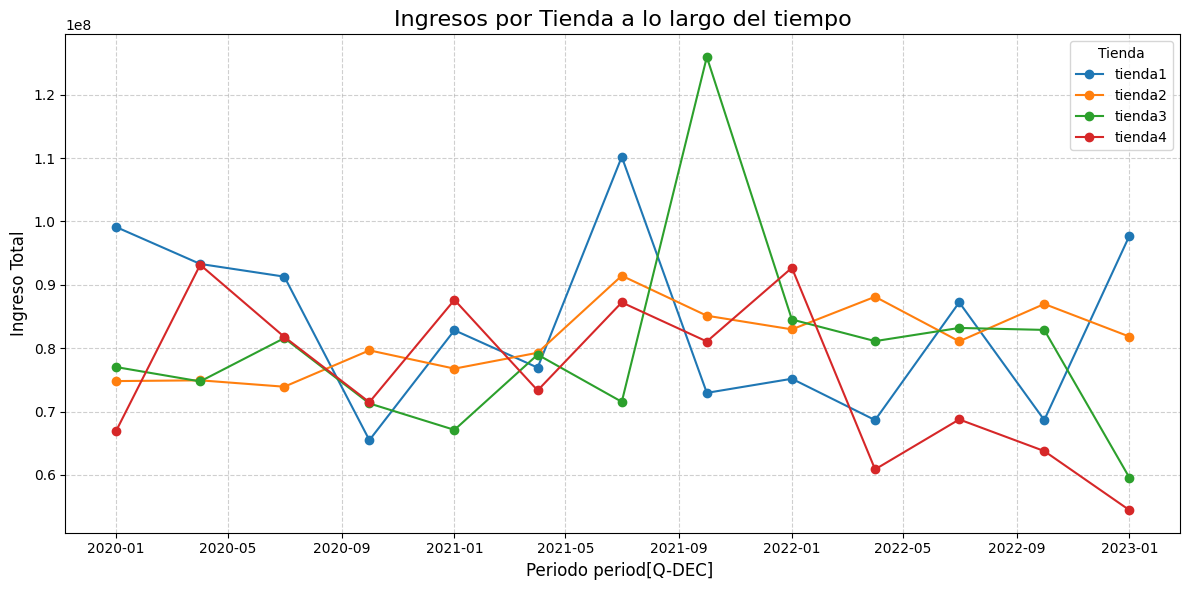

In [21]:

def ingresos_por_tienda_y_tiempo(df_all,periodo="M"):
  """
    Devuelve df con ingresos por tienda por el periodo.

    Parámetros
    ----------
    df_all :
      df con informacion de todas las tiendas, debe por lo menos tener las columnas:
      'Tienda', 'Fecha de Compra', 'Precio', 'Costo de envío' y/o 'Ingreso Total'
    periodo:
      D calendar day frequency
      W weekly frequency
      M monthly frequency
      Q quarterly frequency
      Y yearly frequency
  """
  if periodo not in ['D', 'W', 'M', 'Q', 'Y']:
    raise ValueError(
        f"El parámetro 'periodo' debe ser uno de: D, W, M, Q, Y. Valor recibido: {periodo}"
    )

  if any(col not in df_all.columns for col in ['Tienda', 'Fecha de Compra', 'Precio', 'Costo de envío']):
    raise ValueError("Las columnas necesarias para el calculo no estan presentes")

  if 'Ingreso Total' not in df_all.columns:
    df_all["Ingreso Total"] = df_all["Precio"] - df_all["Costo de envío"]

  df = df_all[["Tienda","Fecha de Compra","Ingreso Total"]].copy()

  df["Periodo"] = df["Fecha de Compra"].dt.to_period(periodo)

  df_ingresos = df.groupby(["Tienda","Periodo"])["Ingreso Total"].sum().reset_index().sort_values(["Tienda", "Periodo"])

  return df_ingresos



def graficar_ingresos_por_tienda(df_ingresos):
    """
    Grafica los ingresos por tienda a través del tiempo usando la salida
    de la función ingresos_por_tienda_y_tiempo().

    Parámetros
    ----------
    df_ingresos : DataFrame
        Debe contener las columnas: 'Tienda', 'Periodo', 'Ingreso Total'
    """

    columnas_necesarias = ['Tienda', 'Periodo', 'Ingreso Total']
    faltantes = [c for c in columnas_necesarias if c not in df_ingresos.columns]
    if faltantes:
        raise ValueError(f"El DataFrame no contiene las columnas necesarias: {faltantes}")

    per = df_ingresos['Periodo'].dtype.name

    # Convertir Period a fecha para graficar
    df_plot = df_ingresos.copy()
    df_plot["Fecha"] = df_plot["Periodo"].dt.to_timestamp()

    # Crear la gráfica
    plt.figure(figsize=(12, 6))

    # Graficar cada tienda por separado
    for tienda, df_t in df_plot.groupby("Tienda"):
        plt.plot(df_t["Fecha"], df_t["Ingreso Total"], marker="o", label=tienda)

    # Formato de la gráfica
    plt.title("Ingresos por Tienda a lo largo del tiempo", fontsize=16)
    plt.xlabel(f"Periodo {per} ", fontsize=12)
    plt.ylabel("Ingreso Total", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Tienda")
    plt.tight_layout()
    plt.show()

df_ingresos_periodo = ingresos_por_tienda_y_tiempo(df_all,periodo="Q")
graficar_ingresos_por_tienda(df_ingresos_periodo)

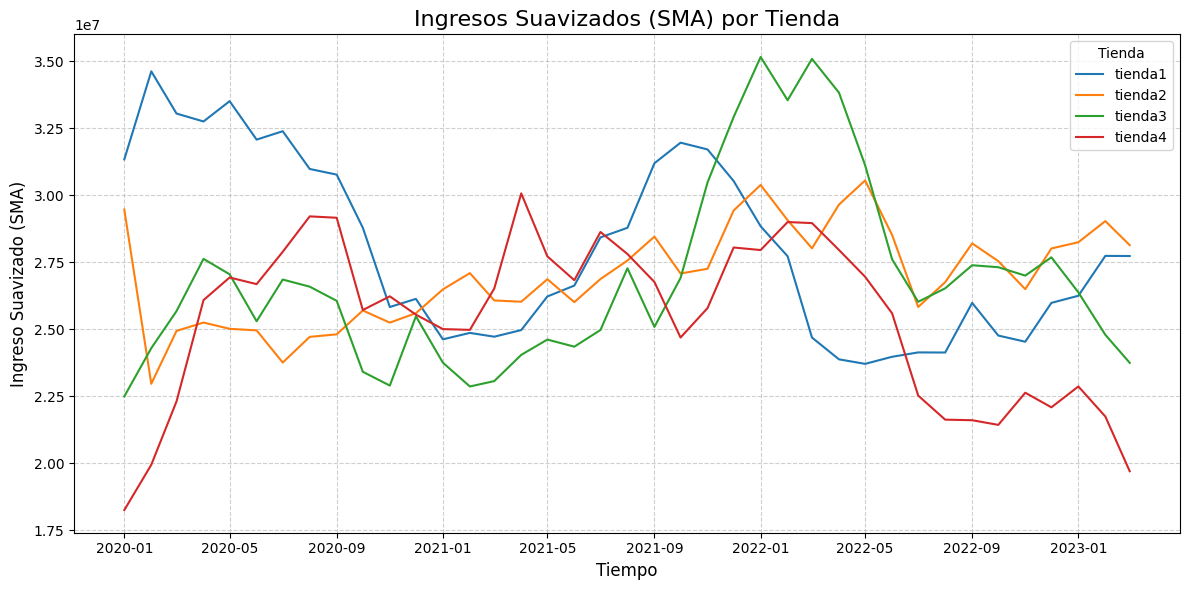

In [22]:
def ingresos_suavizados(df_ingresos, window=30):
    """
    Calcula el promedio móvil (SMA) de *window* periodos para los ingresos por tienda.

    Parámetros
    ----------
    df_ingresos : DataFrame
        Debe contener las columnas:
        'Tienda', 'Periodo', 'Ingreso Total'

    window : int
        Tamaño de la ventana para el promedio móvil.
        Ejemplo:
            - Periodo D  + window=30  -> SMA 30 días
            - Periodo W  + window=8   -> SMA 8 semanas
            - Periodo M  + window=6   -> SMA 6 meses

    Retorna
    -------
    DataFrame con columnas:
      'Tienda', 'Periodo', 'Ingreso Total', 'time', 'SMA'
    """

    # Validaciones
    columnas_necesarias = ['Tienda', 'Periodo', 'Ingreso Total']
    faltantes = [c for c in columnas_necesarias if c not in df_ingresos.columns]
    if faltantes:
        raise ValueError(f"Faltan columnas necesarias: {faltantes}")

    if not isinstance(window, int) or window <= 0:
        raise ValueError("window debe ser un entero positivo.")

    # Copia del DF
    df = df_ingresos.copy()

    # Convertir Period a datetime
    df['time'] = df['Periodo'].dt.to_timestamp()

    # Ordenar (MUY importante para rolling)
    df = df.sort_values(['Tienda', 'time'])

    # Calcular SMA por tienda
    df['SMA'] = (
        df.groupby('Tienda')['Ingreso Total']
          .transform(lambda s: s.rolling(window=window, min_periods=1).mean())
    )

    return df


def graficar_SMA(df_suavizado):
    """
    Grafica únicamente la curva suavizada (SMA) de ingresos por tienda
    en una sola figura.

    Parámetros
    ----------
    df_suavizado : DataFrame
        Debe contener las columnas:
        'Tienda', 'time', 'SMA'
        (Salida de la función ingresos_suavizados)
    """

    columnas_req = ['Tienda', 'time', 'SMA']
    faltantes = [c for c in columnas_req if c not in df_suavizado.columns]
    if faltantes:
        raise ValueError(f"Faltan columnas necesarias para graficar: {faltantes}")

    plt.figure(figsize=(12, 6))

    # Graficar por tienda
    for tienda, df_t in df_suavizado.groupby('Tienda'):
        plt.plot(df_t['time'], df_t['SMA'], label=tienda)

    # Estética
    plt.title("Ingresos Suavizados (SMA) por Tienda", fontsize=16)
    plt.xlabel("Tiempo", fontsize=12)
    plt.ylabel("Ingreso Suavizado (SMA)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title="Tienda")
    plt.tight_layout()
    plt.show()

df_ingresos_periodo = ingresos_por_tienda_y_tiempo(df_all,periodo="M")
df_suavizado = ingresos_suavizados(df_ingresos_periodo, window=6)
graficar_SMA(df_suavizado)


# 2. Ventas por categoría

## Análisis general

<Figure size 1200x600 with 0 Axes>

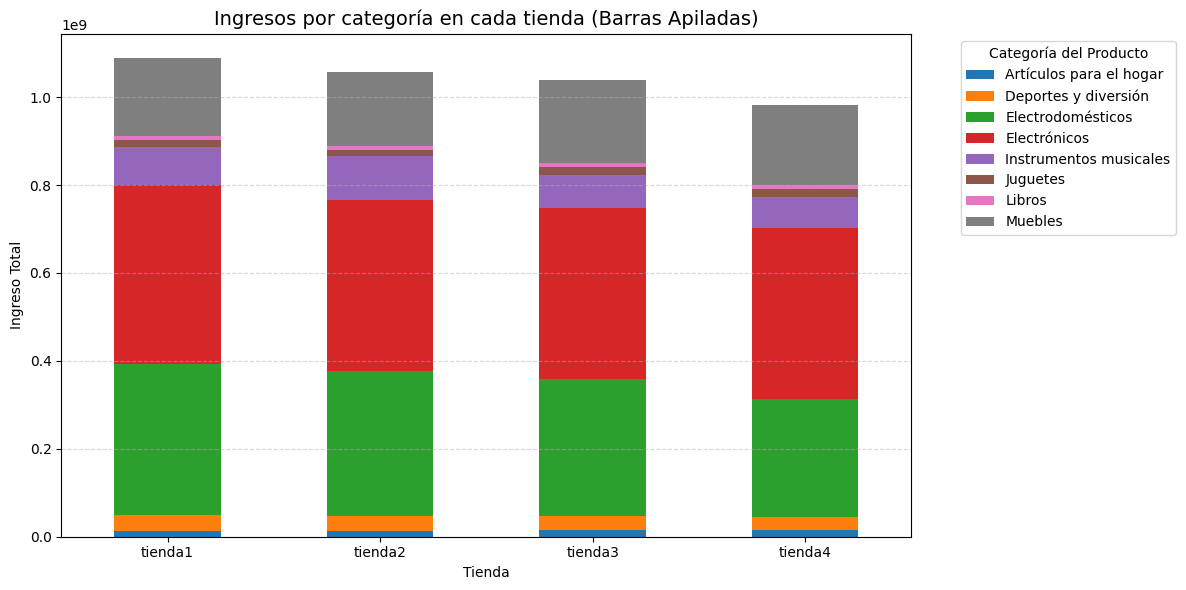

Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
tienda1,12054600.0,37168900.0,344361200.0,406529800.0,86415100.0,17016200.0,8317900.0,177638800.0
tienda2,13946100.0,32867200.0,330012200.0,389016900.0,99432600.0,15057800.0,9535400.0,166990200.0
tienda3,14247600.0,33670000.0,311743700.0,388919900.0,73272100.0,18359400.0,9002300.0,190288000.0
tienda4,14220400.0,31580000.0,268237700.0,387647800.0,71148500.0,19149700.0,8780600.0,182293600.0


In [36]:
def ingresos_por_tienda_categoria(df_all):
  """
    Devuelve df con ingresos por tienda agrupado por 'Categoría del Producto'

   Parámetros
    ----------
    df_all :
      df con informacion de todas las tiendas, debe por lo menos tener las columnas:
      'Tienda', 'Categoría del Producto','Ingreso Total'
  """
  req_columns = ['Tienda','Categoría del Producto', 'Ingreso Total']

  if any(col not in df_all.columns for col in req_columns):
    raise ValueError("Las columnas necesarias para el calculo no estan presentes")

  df = df_all[req_columns].copy()

  df_ingresos = (df.groupby(["Tienda","Categoría del Producto"])["Ingreso Total"]
                 .sum().reset_index().sort_values(["Tienda","Ingreso Total"],ascending=[True,False]  )
                 )

  return df_ingresos


def graficar_ingresos_por_tienda_y_categoria(df_ingresos):
    """
    Grafica 1 barra por tienda (stacked bar chart), dividida por categoría.

    Parámetros
    ----------
    df_ingresos : DataFrame
        Debe contener:
        'Tienda', 'Categoría del Producto', 'Ingreso Total'
    """

    req = ["Tienda", "Categoría del Producto", "Ingreso Total"]
    faltan = [c for c in req if c not in df_ingresos.columns]
    if faltan:
        raise ValueError(f"Columnas faltantes: {faltan}")

    # Crear tabla pivote: filas = tiendas, columnas = categorías
    df_plot = df_ingresos.pivot_table(
        index="Tienda",
        columns="Categoría del Producto",
        values="Ingreso Total",
        aggfunc="sum",
        fill_value=0
    )

    # Gráfica
    plt.figure(figsize=(12, 6))
    df_plot.plot(kind="bar", stacked=True, figsize=(12, 6))

    plt.title("Ingresos por categoría en cada tienda (Barras Apiladas)", fontsize=14)
    plt.xlabel("Tienda")
    plt.ylabel("Ingreso Total")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Leyenda a la derecha
    plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

    return df_plot

df_ingresos_categoria = ingresos_por_tienda_categoria(df_all)
df_plot = graficar_ingresos_por_tienda_y_categoria(df_ingresos_categoria)
df_plot

## Análisis en el tiempo por categoria

In [53]:
def ingresos_categoria_en_tiempo(df_all,periodo="M"):
  """
  Devuelve df con ingresos por tienda agrupado por 'Categoría del Producto' y periodo

  Parámetros:
  ----------
  df_all :
    df con informacion de todas las tiendas, debe por lo menos
    tener las columnas:
    'Tienda', 'Categoría del Producto','Fecha de Compra','Ingreso Total'
  periodo:
    D calendar day frequency
    W weekly frequency
    M monthly..
  """

  if periodo not in ['D', 'W', 'M', 'Q', 'Y']:
    raise ValueError(
        f"Periodo debe ser uno de: D, W, M, Q, Y. Valor recibido: {periodo}")

  req_columns = ['Tienda','Categoría del Producto','Fecha de Compra','Ingreso Total']
  if any(col not in df_all.columns for col in req_columns):
    raise ValueError("Las columnas necesarias para el calculo no estan presentes")

  df = df_all[req_columns].copy()

  df["Periodo"] = df["Fecha de Compra"].dt.to_period(periodo)


  df_analisis = df.groupby(["Periodo","Categoría del Producto"])["Ingreso Total"].sum()


  df_analisis = (df_analisis.reset_index()
                  .sort_values(["Periodo","Ingreso Total"],ascending=[True,False]))
  return df_analisis


df_cat_tiempo = ingresos_categoria_en_tiempo(df_all,periodo="M")
df_cat_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 3 to 304
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   Periodo                 312 non-null    period[M]
 1   Categoría del Producto  312 non-null    object   
 2   Ingreso Total           312 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 9.8+ KB


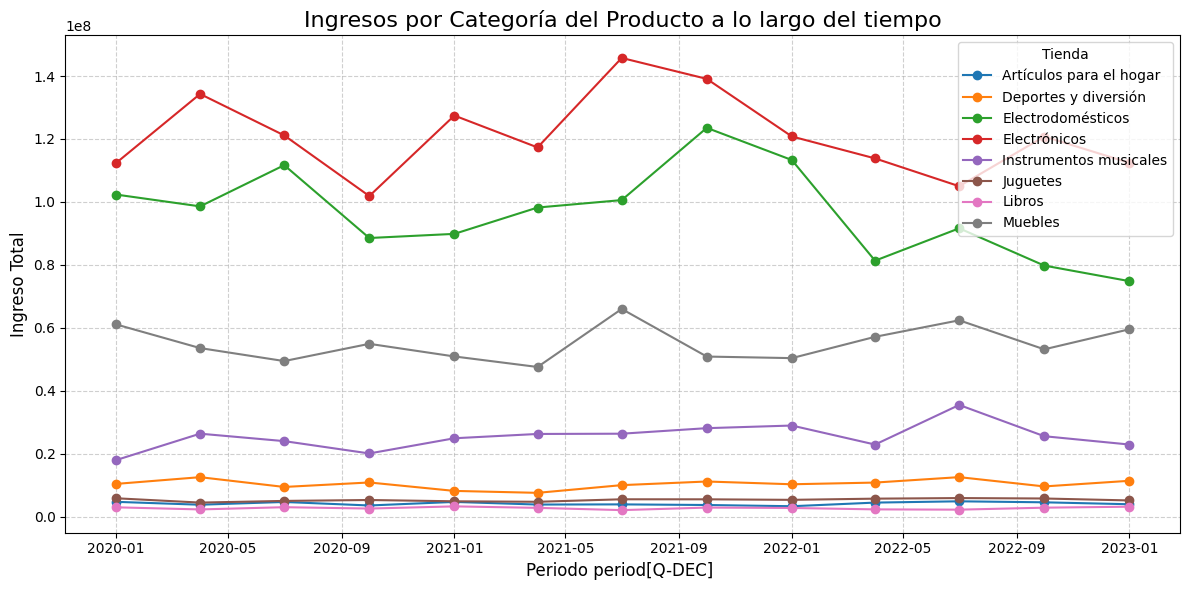

In [58]:


def graficar_ingresos_categoria_tiempo(df_cat_tiempo):
  """
  Grafica los ingresos por tienda a través del tiempo usando la salida
  de la función ingresos_por_tienda_y_tiempo().

  Parámetros
  ----------
  df_ingresos : DataFrame
      Debe contener las columnas: 'Periodo', 'Categoría del Producto', 'Ingreso Total'
  """

  columnas_necesarias = ['Periodo', 'Categoría del Producto', 'Ingreso Total']
  faltantes = [c for c in columnas_necesarias if c not in df_cat_tiempo.columns]
  if faltantes:
      raise ValueError(f"El DataFrame no contiene las columnas necesarias: {faltantes}")

  per = df_cat_tiempo['Periodo'].dtype.name

  # Convertir Period a fecha para graficar
  df_plot = df_cat_tiempo.copy()
  df_plot["Fecha"] = df_plot["Periodo"].dt.to_timestamp()

  # Crear la gráfica
  plt.figure(figsize=(12, 6))

  # Graficar cada tienda por separado
  for tienda, df_t in df_plot.groupby('Categoría del Producto'):
      plt.plot(df_t["Fecha"], df_t["Ingreso Total"], marker="o", label=tienda)

  # Formato de la gráfica
  plt.title("Ingresos por Categoría del Producto a lo largo del tiempo", fontsize=16)
  plt.xlabel(f"Periodo {per} ", fontsize=12)
  plt.ylabel("Ingreso Total", fontsize=12)
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.legend(title="Tienda")
  plt.tight_layout()
  plt.show()
df_cat_tiempo = ingresos_categoria_en_tiempo(df_all,periodo="Q")
graficar_ingresos_categoria_tiempo(df_cat_tiempo)

In [ ]:
# def plot_sma_ventas_por_categoria(df, window=30, fecha_col='fecha',
#                                   cat_col='Categoría del Producto',
#                                   valor_col='Precio'):
#     """
#     Grafica las ventas por categoría en el tiempo usando SMA (media móvil simple).

#     Parámetros
#     ----------
#     df: DataFrame con datos diarios.
#     window: ventana de suavizado (ej. 30 días).
#     fecha_col: nombre de la columna de fecha.
#     cat_col: nombre de columna de categoría.
#     valor_col: nombre de la columna de ventas/precio.
#     """

#     # Aseguramos datetime
#     df[fecha_col] = pd.to_datetime(df[fecha_col])

#     # Agrupamos por categoría y fecha, sumando ventas
#     df_group = df.groupby([fecha_col, cat_col])[valor_col].sum().reset_index()

#     # Pivot para tener cada categoría como columna
#     df_pivot = df_group.pivot(index=fecha_col, columns=cat_col, values=valor_col)

#     # Ordenar fechas
#     df_pivot = df_pivot.sort_index()

#     # Aplicar SMA por categoría
#     df_sma = df_pivot.rolling(window=window, min_periods=1).mean()

#     # Plot
#     plt.figure(figsize=(14, 7))

#     for categoria in df_sma.columns:
#         plt.plot(df_sma.index, df_sma[categoria], linewidth=2, label=categoria)

#     plt.title(f"Ventas por Categoría (SMA {window} días)", fontsize=16)
#     plt.xlabel("Fecha")
#     plt.ylabel("Ventas Suavizadas")
#     plt.legend(title="Categoría")
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()



/tmp/ipython-input-3683658792.py:93: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


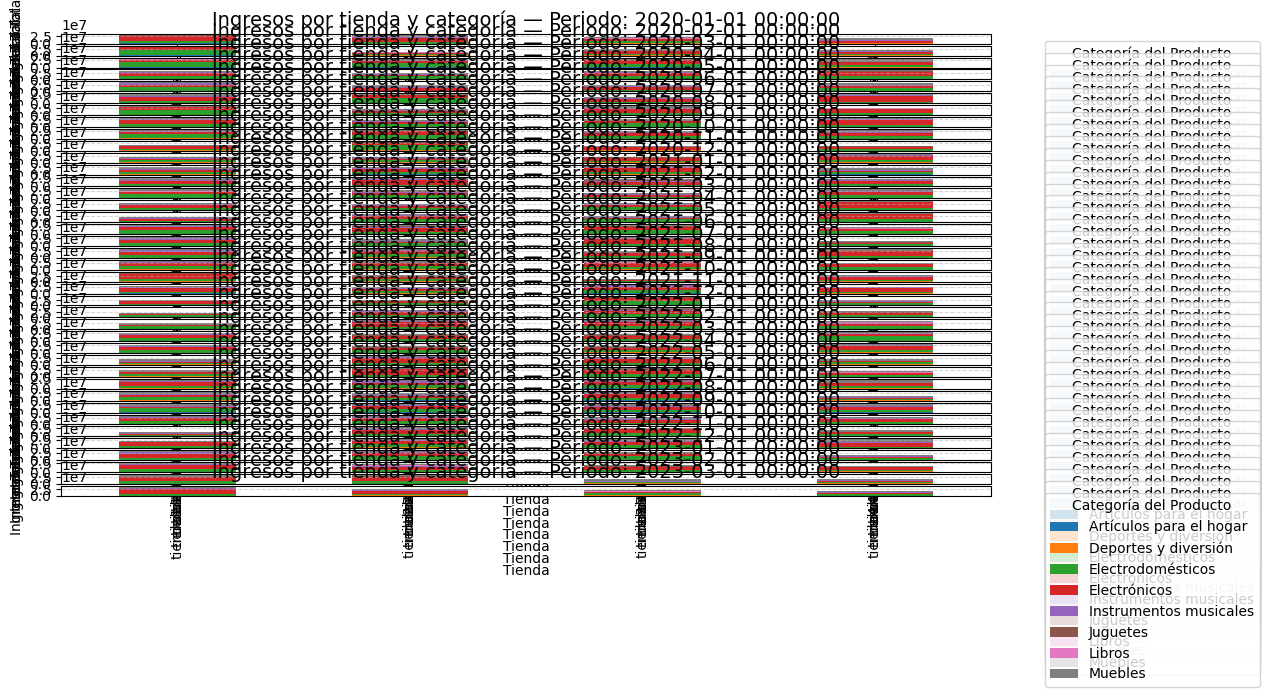

In [50]:
# def ingresos_por_tienda_categoria_y_tiempo(df_all, periodo="M"):
#     """
#     Devuelve df con ingresos por tienda, categoría y periodo.

#     Parámetros:
#     -----------
#     df_all : DataFrame
#         Debe contener:
#         'Tienda', 'Categoría del Producto', 'Fecha de Compra', 'Ingreso Total'
#     periodo : str
#         Frecuencia temporal (D, W, M, Q, Y)
#     """

#     if periodo not in ['D', 'W', 'M', 'Q', 'Y']:
#         raise ValueError(f"Periodo debe ser uno de: D, W, M, Q, Y. Valor recibido: {periodo}")

#     req_columns = ['Tienda', 'Categoría del Producto', 'Fecha de Compra', 'Ingreso Total']
#     faltantes = [c for c in req_columns if c not in df_all.columns]
#     if faltantes:
#         raise ValueError(f"Faltan columnas necesarias: {faltantes}")

#     df = df_all[req_columns].copy()

#     df["Periodo"] = df["Fecha de Compra"].dt.to_period(periodo)

#     df_analisis = (
#         df.groupby(["Periodo", "Tienda", "Categoría del Producto"])["Ingreso Total"]
#           .sum()
#           .reset_index()
#           .sort_values(["Periodo", "Tienda", "Ingreso Total"], ascending=[True, True, False])
#     )

#     return df_analisis


# def graficar_ingresos_tienda_categoria_tiempo(df_ing):
#     """
#     Grafica ingresos por tienda, categoría y periodo como
#     barras apiladas (stacked bar chart), una gráfica por periodo.

#     Parámetros
#     ----------
#     df_ing : DataFrame
#         Salida de ingresos_por_tienda_categoria_y_tiempo()
#     """

#     # Validación
#     req = ['Periodo', 'Tienda', 'Categoría del Producto', 'Ingreso Total']
#     faltan = [c for c in req if c not in df_ing.columns]
#     if faltan:
#         raise ValueError(f"El DataFrame no contiene las columnas necesarias: {faltan}")

#     # Convertir Periodo para ordenar
#     df = df_ing.copy()
#     df["Periodo_ts"] = df["Periodo"].dt.to_timestamp()

#     # Periodos únicos ordenados
#     periodos = sorted(df["Periodo_ts"].unique())

#     n = len(periodos)
#     fig, axes = plt.subplots(n, 1, figsize=(14, 5*n), sharex=False)

#     # Si solo hay 1 periodo, forzar lista
#     if n == 1:
#         axes = [axes]

#     for ax, periodo in zip(axes, periodos):
#         df_p = df[df["Periodo_ts"] == periodo]

#         # Pivot: filas = tiendas, columnas = categoría
#         tabla = df_p.pivot_table(
#             index="Tienda",
#             columns="Categoría del Producto",
#             values="Ingreso Total",
#             aggfunc="sum",
#             fill_value=0
#         )

#         # Gráfico apilado
#         tabla.plot(
#             kind="bar",
#             stacked=True,
#             ax=ax,
#             figsize=(12, 6)
#         )

#         ax.set_title(f"Ingresos por tienda y categoría — Periodo: {periodo}", fontsize=14)
#         ax.set_xlabel("Tienda")
#         ax.set_ylabel("Ingreso Total")
#         ax.grid(axis='y', linestyle='--', alpha=0.5)
#         ax.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc="upper left")

#     plt.tight_layout()
#     plt.show()


# df_tc = ingresos_por_tienda_categoria_y_tiempo(df_all, periodo="M")
# graficar_ingresos_tienda_categoria_tiempo(df_tc)


# 3. Calificación promedio de la tienda


In [ ]:
cal = {}
for name, df in all_data.items():
  cal[name] = df['Calificación'].mean()
df_calificacion = pd.DataFrame(cal.items(), columns=['Tienda', 'Calificación']).sort_values(by='Calificación',ascending=False)
print("calificacion promedio por tienda")
df_calificacion

In [ ]:
def clasificacion_por_tienda_y_tiempo(all_data,periodo="M"):
  """
    Devuelve df con clasificacion por tienda por el periodo:
    D calendar day frequency
    W weekly frequency
    M monthly frequency
    Q quarterly frequency
    Y yearly frequency
  """
  df_analisis = None

  for tienda, df in all_data.items():
    df = df.copy()
    df["Ingreso Total"] = df["Precio"] - df["Costo de envío"]
    df["time"] = df["Fecha de Compra"].dt.to_period(periodo)

    # Agrupar por mes
    df_ingreso_tienda = (
        df.groupby("time")["Ingreso Total"]
        .sum()
        .to_frame(name=tienda)
        .reset_index()
    )

    # Merge acumulativo
    if df_ingresos is None:
        df_ingresos = df_ingreso_tienda
    else:
        df_ingresos = df_ingresos.merge(df_ingreso_tienda, on="time", how="outer")

    #Ordenar los meses
    df_ingresos = df_ingresos.sort_values("time").reset_index(drop=True)

  return df_ingresos

In [ ]:
def calificacion_por_tienda_categoria(all_data):

  df_calificacion = None

  for tienda, df in all_data.items():
    df_calificacion_tienda =  df.groupby("Categoría del Producto")["Calificación"].mean()
    df_calificacion_tienda = df_calificacion_tienda.to_frame(name=tienda)
    df_calificacion_tienda = df_calificacion_tienda.reset_index()
    if df_calificacion is None:
      df_calificacion = df_calificacion_tienda
    else:
      df_calificacion = df_calificacion.merge(df_calificacion_tienda, on="Categoría del Producto", how="outer")

  df_calificacion["promedio"] = df_calificacion.drop(columns=["Categoría del Producto"]).mean(axis=1)
  df_calificacion = df_calificacion.sort_values(by="promedio", ascending=False)

  return df_calificacion

df_calificacion = calificacion_por_tienda_categoria(all_data)
df_calificacion

In [ ]:
def califiacion_por_vendedor(all_data):

  df_calificacion = None

  for tienda, df in all_data.items():
    df_calificacion_tienda =  df.groupby("Vendedor")["Calificación"].mean()
    df_calificacion_tienda = df_calificacion_tienda.reset_index()
    df_calificacion_tienda.insert(0, "tienda", tienda)
    if df_calificacion is None:
      df_calificacion = df_calificacion_tienda
    else:
      df_calificacion = pd.concat([df_calificacion, df_calificacion_tienda])

  return df_calificacion


df_cal_vendedor = califiacion_por_vendedor(all_data)

In [ ]:
#mejores 5  vendedores globalmente, para todas las tiendas
df_cal_vendedor.sort_values(by="Calificación",ascending=False).head(5)

In [ ]:
#top 3 vendedores por tienda
n =3
df_mejores_vendedores = (df_cal_vendedor.sort_values(["tienda", "Calificación"], ascending=[True, False])
.groupby("tienda")
.head(n)
.reset_index(drop=True))
df_mejores_vendedores

In [ ]:
# df_vendedores_en_promedio = (
#     df_cal_vendedor
#     .groupby("tienda", group_keys=False)
#     .apply(lambda g:
#         g[g["Calificación"].between(g["Calificación"].mean() - 0.05,
#                                     g["Calificación"].mean() + 0.05)],include_groups=False
#     )
# )

In [ ]:
#Anailisis por vendedor y categoria??
# df_analisis = all_data['tienda2'].copy()
# df_analisis = df_analisis.groupby(['Categoría del Producto','Vendedor'])['Calificación'].mean().sort_values(ascending=False)
# df_analisis = df_analisis.to_frame()
# df_analisis.columns = df_analisis.columns.values
# df_analisis= df_analisis.reset_index()
# df_analisis[df_analisis['Vendedor']=='Mariana Herrera']

# 4. Productos más y menos vendidos

In [ ]:
def califiacion_por_producto(all_data):

  df_calificacion = None

  df_calificacion_producto = pd.DataFrame(columns=['Producto','Calificación'])
  for df in all_data.values():
    df_calificacion_producto = pd.concat([df_calificacion_producto,df[['Producto','Calificación']]])

  df_calificacion_producto =  df.groupby('Producto')['Calificación'].mean()
  df_calificacion_producto = df_calificacion_producto.reset_index()
  df_calificacion_producto.sort_values(by='Calificación',ascending=False,inplace=True)
  return df_calificacion_producto


df_cal_producto = califiacion_por_producto(all_data)
df_cal_producto.head()


In [ ]:
def califiacion_producto_tienda(all_data):

  df_calificacion = None

  for tienda, df in all_data.items():
    df = df.copy()
    df["Ingreso Total"] = df["Precio"] - df["Costo de envío"]

    df_ingreso_tienda = (
        df.groupby("producto")["Ingreso Total"]
        .sum()
        .to_frame(name=tienda)
        .reset_index()
    )




    df[]
    df_calificacion_tienda =  df.groupby("producto")["Calificación"].sum()
    df_calificacion_tienda = df_calificacion_tienda.reset_index()
    df_calificacion_tienda.insert(0, "tienda", tienda)
    if df_calificacion is None:
      df_calificacion = df_calificacion_tienda
    else:
      df_calificacion = pd.concat([df_calificacion, df_calificacion_tienda])

  return df_calificacion




In [ ]:
all_data['tienda1'].head(2)

# 5. Envío promedio por tienda

# Notas